In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
#import tensorflow as tf
from sklearn.metrics import roc_auc_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import joblib

In [3]:
df = pd.read_csv("C__Users_Bob_Desktop_my_data.csv")
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [4]:
from sklearn.utils import shuffle
df = shuffle(df,random_state=50)

In [5]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder1 = preprocessing.LabelEncoder()
df['proto']= label_encoder1.fit_transform(df['proto'])
  
df['proto'].unique()
label_encoder2 = preprocessing.LabelEncoder()
df['attack_cat']= label_encoder2.fit_transform(df['attack_cat'])
  
df['attack_cat'].unique()

label_encoder3 = preprocessing.LabelEncoder()
df['service']= label_encoder3.fit_transform(df['service'])
  
df['service'].unique()
label_encoder4 = preprocessing.LabelEncoder()
df['state']= label_encoder4.fit_transform(df['state'])
  
df['state'].unique()

array([ 2,  4,  5,  7,  9,  8,  3,  0,  6, 10,  1])

In [6]:
y=df['label']
#y1=df.iloc[:,-1]
x_k=df.drop(['label','attack_cat','id','dwin','sloss','stcpb','dtcpb','swin','response_body_len','ct_flw_http_mthd','trans_depth','is_sm_ips_ports','is_ftp_login','ct_ftp_cmd'],axis=1)
#y= df['attack_cat']

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_k_1= sc.fit_transform(x_k)

x = pd.DataFrame(x_k_1)

x.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.881667e-05,0.901515,0.000000,0.2,0.000282,0.000363,0.000035,0.000021,0.004049,0.121569,...,0.071622,0.050667,0.161290,0.000000,0.034483,0.000000,0.000000,0.031250,0.067797,0.081967
1,3.751644e-02,0.856061,0.750000,0.4,0.008361,0.002723,0.006857,0.000153,0.000053,0.243137,...,0.722973,0.050000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.369212e-02,0.856061,0.000000,0.2,0.000470,0.000182,0.000069,0.000006,0.000003,0.243137,...,0.097973,0.028667,0.016129,0.500000,0.034483,0.000000,0.000000,0.000000,0.000000,0.032787
3,5.000001e-08,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.333333,0.996078,...,0.022297,0.000000,0.467742,0.333333,0.068966,0.068966,0.088889,0.453125,0.084746,0.475410
4,2.057985e-02,0.856061,0.416667,0.4,0.001221,0.001634,0.000116,0.000694,0.000025,0.121569,...,0.064865,0.376667,0.016129,0.000000,0.103448,0.000000,0.000000,0.000000,0.033898,0.016393


In [8]:
y.head()

200566    0
226191    1
245537    0
198365    1
200520    0
Name: label, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=946,stratify=y)

In [11]:
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB()

In [12]:
Gnb.fit(X_train,y_train)

GaussianNB()

In [13]:
joblib.dump(Gnb, 'UNSW_GaussianNaiveBayes_zero_HyperParameter_Binary.pkl')

['UNSW_GaussianNaiveBayes_zero_HyperParameter_Binary.pkl']

In [14]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [15]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
joblib.dump(RF, 'UNSW_RandomForestClassifier_zero_HyperParameter_Binary.pkl')

['UNSW_RandomForestClassifier_zero_HyperParameter_Binary.pkl']

In [19]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(max_iter=1000)

In [20]:
Lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
joblib.dump(Lr, 'UNSW_LogisticRegression_zero_HyperParameter_binary.pkl')

['UNSW_LogisticRegression_zero_HyperParameter_binary.pkl']

In [22]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()

In [23]:
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
joblib.dump(Knn, 'UNSW_KNeighborsClassifier_zero_HyperParameter_binary.pkl')

['UNSW_KNeighborsClassifier_zero_HyperParameter_binary.pkl']

In [59]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

In [60]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
joblib.dump(Dt, 'UNSW_DecisionTreeClassifier_zero_HyperParameter_binary.pkl')

['UNSW_DecisionTreeClassifier_zero_HyperParameter_binary.pkl']

In [10]:
from xgboost import XGBClassifier
import xgboost as xgb

In [11]:
Xg = XGBClassifier()

In [12]:
Xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [13]:
joblib.dump(Xg, 'UNSW_XGBclassifer_Zero_HyperParameter_binary.pkl')

['UNSW_XGBclassifer_Zero_HyperParameter_binary.pkl']

In [25]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()

In [26]:
Ada.fit(X_train,y_train)

AdaBoostClassifier()

In [27]:
joblib.dump(Ada, 'UNSW_AdaBoostClassifier_Zero_HyperParameter_binary.pkl')

['UNSW_AdaBoostClassifier_Zero_HyperParameter_binary.pkl']

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost=GradientBoostingClassifier()

In [91]:
gradboost.fit(X_train,y_train)

GradientBoostingClassifier()

In [92]:
joblib.dump(gradboost,'UNSW_GradientBoostingClassifier_Zero_HyperParameter_binary.pkl')

['UNSW_GradientBoostingClassifier_Zero_HyperParameter_binary.pkl']

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
Ex_tree = ExtraTreesClassifier()

In [33]:
Ex_tree.fit(X_train,y_train)

ExtraTreesClassifier()

In [34]:
joblib.dump(Ex_tree, 'UNSW_ExtraTreesClassifier_zero_HyperParameter_binary.pkl')

['UNSW_ExtraTreesClassifier_zero_HyperParameter_binary.pkl']

In [19]:
def binary_roc_plotter(testX,testy,model,model_name):
            yhat = model.predict_proba(testX)
            # retrieve just the probabilities for the positive class
            pos_probs = yhat[:, 1]
            # plot no skill roc curve
            plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
            # calculate roc curve for model
            fpr, tpr, _ = roc_curve(testy, pos_probs)
            # plot model roc curve
            plt.plot(fpr, tpr, linestyle='--',label=model_name)
            # axis labels
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()

Testing GaussNB

In [36]:
predict_gnb = Gnb.predict(X_test)

In [37]:
Gnb.score(X_test,y_test)

0.7625691277772387

In [16]:
from sklearn.metrics import classification_report

In [39]:
print("Classification Report: GaussNB \n", classification_report(y_test, predict_gnb,digits=5))

Classification Report: GaussNB 
               precision    recall  f1-score   support

           0    0.61883   0.89091   0.73035     18600
           1    0.91804   0.69009   0.78791     32935

    accuracy                        0.76257     51535
   macro avg    0.76844   0.79050   0.75913     51535
weighted avg    0.81005   0.76257   0.76714     51535



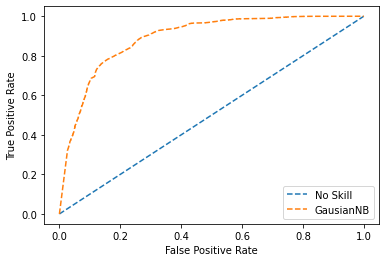

In [40]:
binary_roc_plotter(X_test,y_test,Gnb,'GausianNB')

In [41]:
roc_auc_score(y_test, Gnb.predict_proba(X_test)[:, 1])

0.8893486249389886

In [48]:
from sklearn.metrics import confusion_matrix
CM_GaussNB_binary = confusion_matrix(y_test,predict_gnb)
print('Confusion Matrix: GaussNB_binary \n',CM_GaussNB_binary)

Confusion Matrix: GaussNB_binary 
 [[16571  2029]
 [10207 22728]]


Testing Random Forest

In [43]:
predict_RF = RF.predict(X_test)
RF.score(X_test,y_test)

0.9518385563209469

In [44]:
print("Classification Report: Random Forest \n", classification_report(y_test, predict_RF,digits=5))

Classification Report: Random Forest 
               precision    recall  f1-score   support

           0    0.93170   0.93511   0.93340     18600
           1    0.96328   0.96129   0.96228     32935

    accuracy                        0.95184     51535
   macro avg    0.94749   0.94820   0.94784     51535
weighted avg    0.95188   0.95184   0.95186     51535



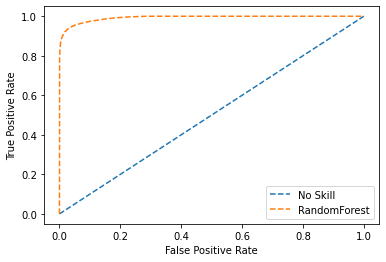

In [45]:
binary_roc_plotter(X_test,y_test,RF,'RandomForest')

In [46]:
roc_auc_score(y_test, RF.predict_proba(X_test)[:, 1])

0.9923052452615203

In [47]:
from sklearn.metrics import confusion_matrix
CM_RF_binary = confusion_matrix(y_test,predict_RF)
print('Confusion Matrix: Random Forest binary \n',CM_RF_binary)

Confusion Matrix: Random Forest binary 
 [[17393  1207]
 [ 1275 31660]]


In [49]:
predict_lr = Lr.predict(X_test)
Lr.score(X_test,y_test)

0.8673328805666052

In [50]:
print("Classification Report: Logistic Regression \n", classification_report(y_test, predict_lr,digits=5))

Classification Report: Logistic Regression 
               precision    recall  f1-score   support

           0    0.90364   0.70790   0.79389     18600
           1    0.85302   0.95737   0.90219     32935

    accuracy                        0.86733     51535
   macro avg    0.87833   0.83264   0.84804     51535
weighted avg    0.87129   0.86733   0.86310     51535



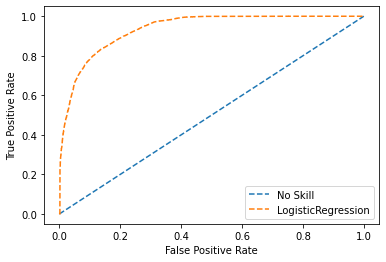

In [51]:
binary_roc_plotter(X_test,y_test,Lr,'LogisticRegression')

In [52]:
roc_auc_score(y_test, Lr.predict_proba(X_test)[:, 1])

0.935092526661345

In [53]:
from sklearn.metrics import confusion_matrix
CM_LR_binary = confusion_matrix(y_test,predict_lr)
print('Confusion Matrix: Logistic Regression binary \n',CM_LR_binary)

Confusion Matrix: Logistic Regression binary 
 [[13167  5433]
 [ 1404 31531]]


In [54]:
predict_knn = Knn.predict(X_test)
Knn.score(X_test,y_test)

0.936606189967983

In [55]:
print("Classification Report: KNN \n", classification_report(y_test, predict_knn,digits=5))

Classification Report: KNN 
               precision    recall  f1-score   support

           0    0.90925   0.91575   0.91249     18600
           1    0.95223   0.94838   0.95030     32935

    accuracy                        0.93661     51535
   macro avg    0.93074   0.93207   0.93140     51535
weighted avg    0.93672   0.93661   0.93665     51535



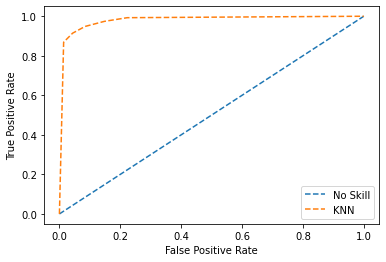

In [56]:
binary_roc_plotter(X_test,y_test,Knn,'KNN')

In [57]:
roc_auc_score(y_test, Knn.predict_proba(X_test)[:, 1])

0.9795980613492525

In [58]:
from sklearn.metrics import confusion_matrix
CM_knn_binary = confusion_matrix(y_test,predict_knn)
print('Confusion Matrix: KNN binary \n',CM_knn_binary)

Confusion Matrix: KNN binary 
 [[17033  1567]
 [ 1700 31235]]


In [62]:
predict_dt = Dt.predict(X_test)
Dt.score(X_test,y_test)

0.9385660230911032

In [63]:
print("Classification Report: Decision Tree \n", classification_report(y_test, predict_dt,digits=5))

Classification Report: Decision Tree 
               precision    recall  f1-score   support

           0    0.91512   0.91462   0.91487     18600
           1    0.95180   0.95209   0.95194     32935

    accuracy                        0.93857     51535
   macro avg    0.93346   0.93336   0.93341     51535
weighted avg    0.93856   0.93857   0.93856     51535



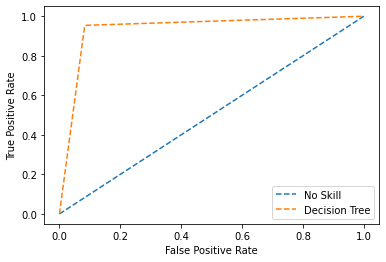

In [64]:
binary_roc_plotter(X_test,y_test,Dt,'Decision Tree')

In [65]:
roc_auc_score(y_test, Dt.predict_proba(X_test)[:, 1])

0.9353926314621012

In [66]:
from sklearn.metrics import confusion_matrix
CM_dt_binary = confusion_matrix(y_test,predict_dt)
print('Confusion Matrix: Decision Tree binary \n',CM_dt_binary)

Confusion Matrix: Decision Tree binary 
 [[17012  1588]
 [ 1578 31357]]


In [67]:
predict_ada = Ada.predict(X_test)
Ada.score(X_test,y_test)

0.9249054040943049

In [68]:
print("Classification Report: Adaboost \n", classification_report(y_test, predict_ada,digits=5))

Classification Report: Adaboost 
               precision    recall  f1-score   support

           0    0.89571   0.89629   0.89600     18600
           1    0.94141   0.94107   0.94124     32935

    accuracy                        0.92491     51535
   macro avg    0.91856   0.91868   0.91862     51535
weighted avg    0.92492   0.92491   0.92491     51535



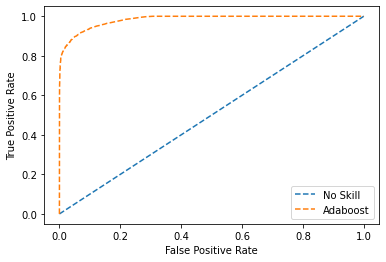

In [69]:
binary_roc_plotter(X_test,y_test,Ada,'Adaboost')

In [70]:
roc_auc_score(y_test, Ada.predict_proba(X_test)[:, 1])

0.9831167206178347

In [71]:
from sklearn.metrics import confusion_matrix
CM_ada_binary = confusion_matrix(y_test,predict_ada)
print('Confusion Matrix: Adaboost binary \n',CM_ada_binary)

Confusion Matrix: Adaboost binary 
 [[16671  1929]
 [ 1941 30994]]


In [93]:
predict_gradboost = gradboost.predict(X_test)
gradboost.score(X_test,y_test)

0.9318327350344426

In [94]:
print("Classification Report: GradientBoost \n", classification_report(y_test, predict_gradboost,digits=5))

Classification Report: GradientBoost 
               precision    recall  f1-score   support

           0    0.91075   0.89925   0.90496     18600
           1    0.94350   0.95024   0.94686     32935

    accuracy                        0.93183     51535
   macro avg    0.92713   0.92474   0.92591     51535
weighted avg    0.93168   0.93183   0.93174     51535



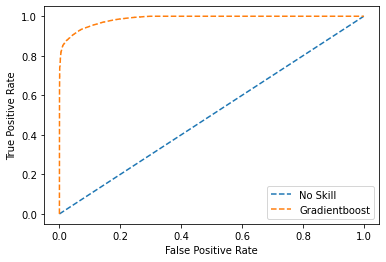

In [95]:
binary_roc_plotter(X_test,y_test,gradboost,'Gradientboost')

In [96]:
roc_auc_score(y_test, gradboost.predict_proba(X_test)[:, 1])

0.9864406104562425

In [97]:
from sklearn.metrics import confusion_matrix
CM_gradboost_binary = confusion_matrix(y_test,predict_gradboost)
print('Confusion Matrix: Gradientboost binary \n',CM_gradboost_binary)

Confusion Matrix: Gradientboost binary 
 [[16726  1874]
 [ 1639 31296]]


In [14]:
predict_xg = Xg.predict(X_test)
Xg.score(X_test,y_test)

0.9482099543999224

In [17]:
print("Classification Report: \n", classification_report(y_test, predict_xg,digits=5))

Classification Report: 
               precision    recall  f1-score   support

           0    0.91913   0.93914   0.92903     18600
           1    0.96520   0.95333   0.95923     32935

    accuracy                        0.94821     51535
   macro avg    0.94216   0.94624   0.94413     51535
weighted avg    0.94857   0.94821   0.94833     51535



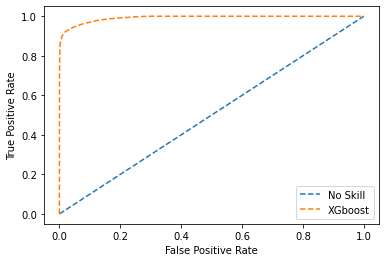

In [20]:
binary_roc_plotter(X_test,y_test,Xg,'XGboost')

In [21]:
roc_auc_score(y_test, Xg.predict_proba(X_test)[:, 1])

0.9917454157831244

In [22]:
from sklearn.metrics import confusion_matrix
CM_xgb_binary = confusion_matrix(y_test,predict_xg)
print('Confusion Matrix: XGboost binary \n',CM_xgb_binary)

Confusion Matrix: XGboost binary 
 [[17468  1132]
 [ 1537 31398]]


In [85]:
predict_extree = Ex_tree.predict(X_test)
Ex_tree.score(X_test,y_test)

0.9491025516639178

In [86]:
print("Classification Report: EXTRA tree  \n", classification_report(y_test, predict_extree,digits=5))

Classification Report: EXTRA tree  
               precision    recall  f1-score   support

           0    0.92731   0.93204   0.92967     18600
           1    0.96151   0.95874   0.96012     32935

    accuracy                        0.94910     51535
   macro avg    0.94441   0.94539   0.94490     51535
weighted avg    0.94917   0.94910   0.94913     51535



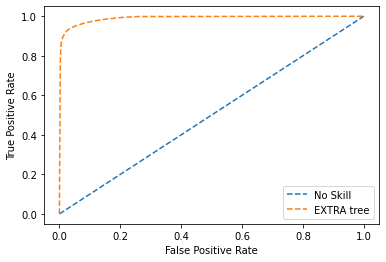

In [87]:
binary_roc_plotter(X_test,y_test,Ex_tree,'EXTRA tree')

In [88]:
roc_auc_score(y_test, Ex_tree.predict_proba(X_test)[:, 1])

0.9901079529408693

In [89]:
from sklearn.metrics import confusion_matrix
CM_Ex_tree_binary = confusion_matrix(y_test,predict_extree)
print('Confusion Matrix: EXTRA tree binary \n',CM_Ex_tree_binary)

Confusion Matrix: EXTRA tree binary 
 [[17336  1264]
 [ 1359 31576]]
